# MUDBENCS CTD Data Visualization

This notebook allows the visualization of CTD data from Seabird .cnv files that are acquired by the Walton Smith CTD data system. 

In [1]:
#Import packages

from seabird.cnv import fCNV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import MUDBENCS_calcs as MB


(((((((((((((((( MUDBENCS Date Analysis and Visualization Tools ))))))))))))))))


## CTD Data
Once the packages are imported, take a look at CTD data structure. Both .cnv files and .bl files are included in the respository named by the convention established previous to our expedition (for example `WS23139_STN05_04CTD.cnv`). You simply have to refer to the sequential CTD number (`05CDT`, for example, in single quotes) as the first variable of the function below. The function `load_CTD_data` provides you with a choice to plot one or more variables in a profile (vertical plot with water depth as the independent variable on the y-axis, and a list of variables separated by commas and within square brackets) in the x-axis or axes. The output of the function includes 4 different dataframes (`down_df`, the downcast data which are undisturbed by the CTD traveling through the water column, `up_df`, the upcast data during which the bottles are fired, `bot_avgs`, the average downcast data for every variable over the range of depths incured during bottle firings of all bottles, and `bot_stds`, the same as `bot_avgs`, but standard deviations instead of averages) which can all be saved as .csv files (second cell below) in the directory of your choice. This provides you with a chance to analyze the data using other platforms. The output variable `ax` allows you some modification permissions for the profile plot if you chose to include that in the function call, and you can also save the plot to a directory of your choice. 

The profile coordinates are latitude: 2.6775, and longitude: -48.2575, collected at  Oct 22 2003  14:24:54
Data types available are:  ['DEPTH', 'CNDC', 'density', 'flSP', 'wetCDOM', 'flECO-AFL', 'sbeox0Mg/L', 'sbeox0PS', 'par', 'PSAL', 'TEMP', 'flag']
Upcast data selected!


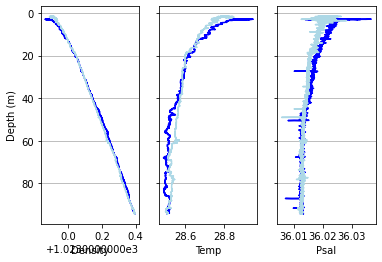

In [2]:
#Explore individual CTD casts using the sequential CTD number. The output variables are the downcast and upcast dataframes,
#bottle depth averages and standard deviations dataframes, and the axes onto which you plot the data if you chose to do so.
#You can save the dataframes as .csv files and you can save the graphical files to any specified directory. 

#Note that the default DEBUG variable is set to False, but you can change that to True to see functions reporting their 
#debugging data.

#You operate this by changing the first variable to the CTD cast of your choice, and you can change the key word arguments
#as well (variables, plot_data, direction) which all correspond to whether you want to plot the data or not. IF YOU WISH
#TO CHANGE VARIABLES TO BE PLOTTED, MAKE SURE THEY MATCH THE DATA TYPES AVAILABLE OUTPUT EXACTLY OR ELSE YOU WILL GET
#A 'KEY ERROR'!

#To use upcast values instead of downcast, add keyword argument "up_cast_only=True" and a comma after direction
#argument to load_CTD_data function below.

MB.DEBUG = False

down_df, up_df, bot_avgs, bot_stds, ax = MB.load_CTD_data(
    '02CTD', #Change this for different CTD casts
    variables=['density', 'TEMP', 'PSAL'],   #Change variables to plot here. Default shown (argument optional)
    plot_data=True, #Change to False to suppress profile plots. True is default (argument optional)
    direction='both',    #Plot downcast, upcast, or both (down, up, both). Both is default (argument optional)
    up_cast_only=True
)


In [3]:
#Investigate the bottle averages and save the averages if you want. This displays the averages, but you can look at the 
#standard deviations simply by changing the name of the variable in the print call. 
print(bot_avgs)

#bot_avgs.to_csv(r'C:\Users\MyName\MyDirectory\10CTD_Avgs.csv')



        DEPTH      CNDC      density      flSP     wetCDOM  flECO-AFL  \
0   59.926892  5.830487  1023.229857  0.111042  175.570146   0.360638   
1   60.274703  5.830361  1023.231684  0.118632   79.726614   0.372186   
2   60.208108  5.830027  1023.232457  0.110844  177.070792   0.354035   
3   60.348811  5.829754  1023.234068  0.118468   88.963073   0.369705   
4   60.707243  5.829837  1023.235381  0.125035    6.300008   0.379630   
5   60.372919  5.829958  1023.233389  0.118698   97.470222   0.373846   
6   60.842703  5.829570  1023.236703  0.118435   95.084586   0.406032   
7   60.995000  5.829936  1023.236311  0.110812  176.801449   0.368051   
8   60.982892  5.829518  1023.237262  0.110976  177.060297   0.396935   
9   61.109703  5.828685  1023.240273  0.112892  164.897743   0.411797   
10   2.138595  5.858075  1022.899132  0.111838  109.298719   0.014968   
11   2.043216  5.858497  1022.897635  0.114114   98.245038   0.014976   

    sbeox0Mg/L   sbeox0PS          par       PSAL 

### Multiple Profiles

Now that we can plot profiles from multiple variables at one station, we can use the combination of casts and variables to plot profiles for all stations and save them to a directory. Below, we manually create a list of stations for which we would like to save a profile and then we run a loop through that list to plot the profiles, create a unique and logical file name, and save the file to a directory.

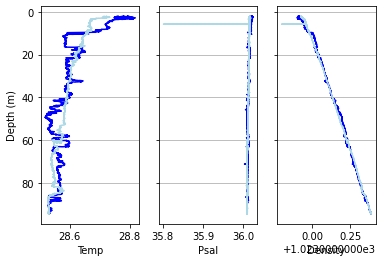

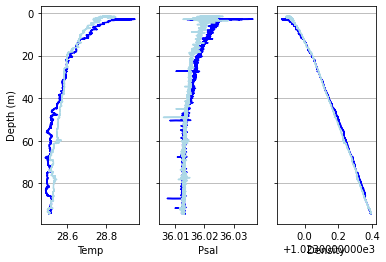

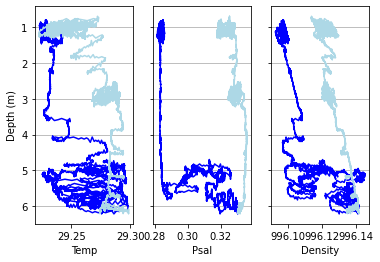

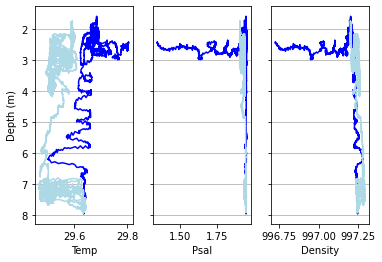

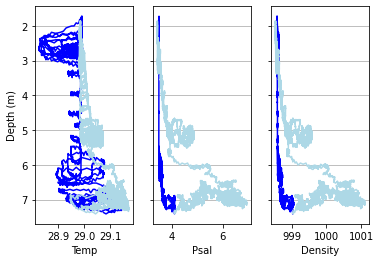

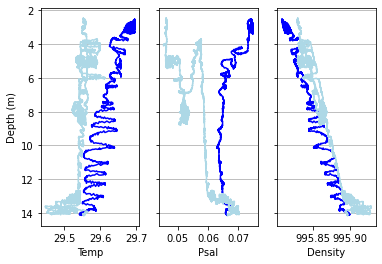

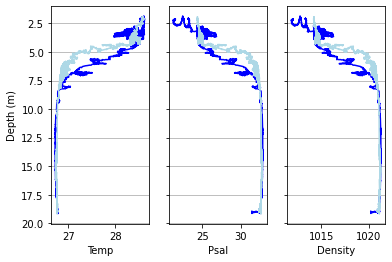

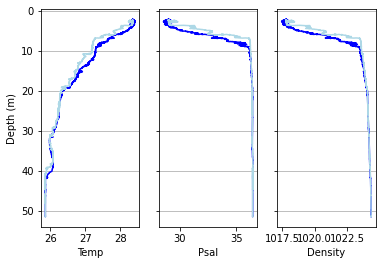

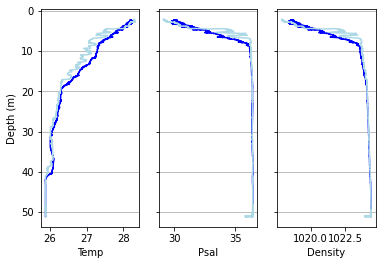

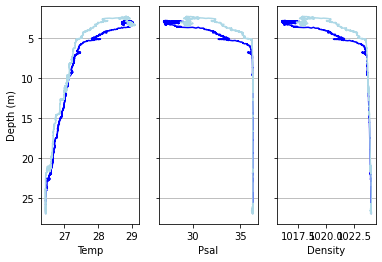

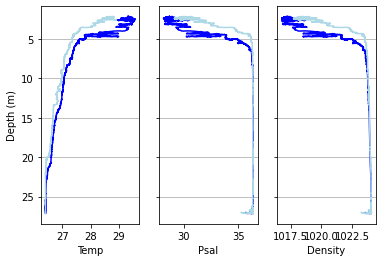

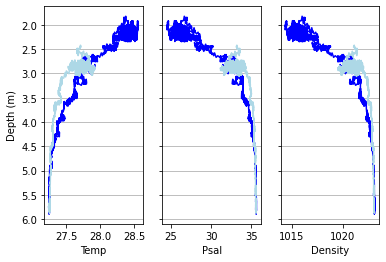

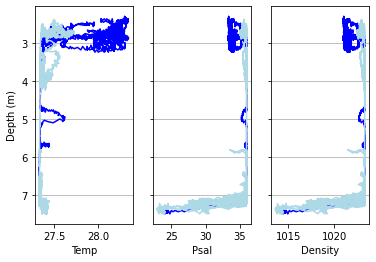

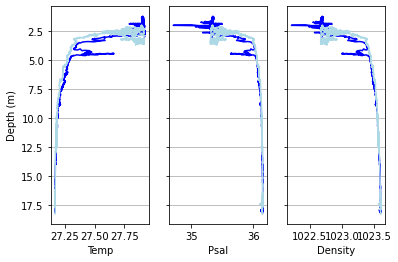

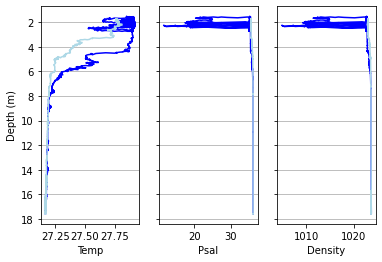

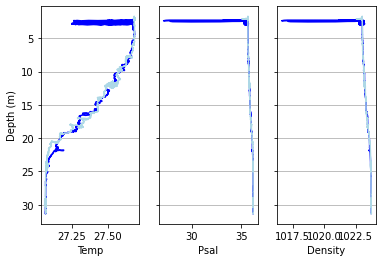

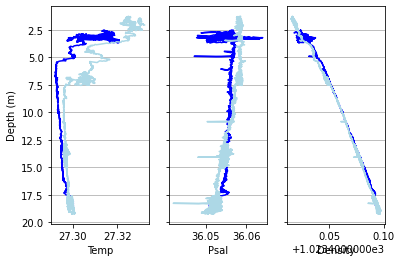

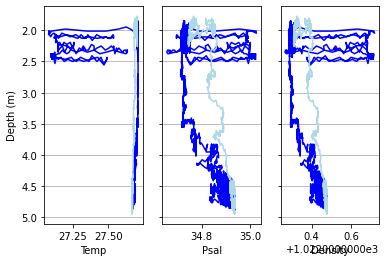

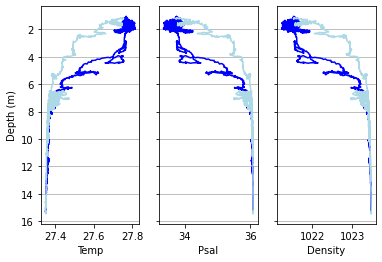

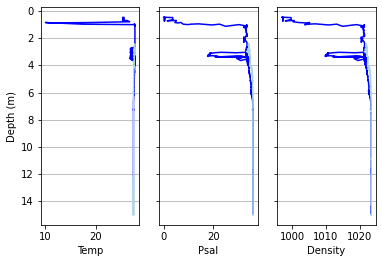

In [4]:
#Create list of stations and sequential CTDs
CTD_list = [
    'STN02_01CTD',
    'STN02_02CTD',
    'STN04_03CTD',
    'STN05_04CTD',
    'STN06_05CTD',
    'STN07_06CTD',
    'STN08_07CTD',
    'STN10_08CTD',
    'STN10_09CTD',
    'STN11_10CTD',
    'STN11_11CTD',
    'STN12_12CTD',
    'STN15_13CTD',
    'STN16_14CTD',
    'STN16_15CTD',
    'STN17_16CTD',
    'STN18_17CTD',
    'STN20_18CTD',
    'STN21_19CTD',
    'STN21_20CTD'
]

#Specify Directory:
directory = 'C:/Users/Name/MyDirectory/CTD_Data'

#Iterate through the list, processing and saving files
for z, ctd in enumerate(CTD_list):
    filein = 'WS23139_'+ctd+'.cnv'      #Construct filename for cnv files (inputs)
    dat_nc = fCNV(filein)
    down_df, up_df, bottom, ax = MB.plot_profile(dat_nc, [ 'TEMP', 'PSAL', 'density'], direction='both')
    fileout = 'WS23139_'+ctd+'Temp_Sal_Rho.svg'
    #plt.savefig(directory+'/'+fileout, dpi=300)
    
    

## Read Along Track Data
Along with CTD data, the WS23-139 cruise had along track data. Here we read those data into this workbook and plot some of the data. 

In [5]:
#Read in the along track data. Set the variable MB.DEBUG to True to print the colunm names. 
MB.DEBUG = True
AT_data_df = MB.read_along_track_data('Both')
print(AT_data_df.shape)

(Index(['Date_Time', 'GPS1 Lat', 'Dir', 'Lon', 'Dir.1', 'SOG Knots',
       'COG Deg. True', 'Lat Dec. Deg.', 'Lon Dec. Deg.', 'GPS2 Lat', 'Dir.2',
       'Lon.1', 'Dir.3', 'SOG Knots.1', 'COG Deg. True.1', 'Lat Dec. Deg..1',
       'Lon Dec. Deg..1', 'Gyro', 'Water Speed F/A Spd. Knots',
       'P/S Spd. Knots', 'PIR w/m^2', 'PSP w/m^2', 'TUV w/m^2',
       'Rain Gauge Cond. Code', 'Inst. Precip. mm/hr', 'Accum. Precip. mm',
       'Depth Feet', 'Meters', 'Fathoms', 'Fluorometer Reading Volts', 'Gain',
       'DisOrgMat Reading Volts', 'Gain.1', 'SBTemp Degrees C', 'POSMV Lat',
       'Dir.4', 'Lon.2', 'Dir.5', 'SOG Knots.2', 'COG Degrees T',
       'Lat Dec. Deg..2', 'Lon Dec. Deg..2', 'POSMV Heading Degrees T',
       'RM Young Barometer mb', 'Stbd RM Young Winds Rel. Wind Spd. Knots',
       'Rel. Wind Dir. Degrees', 'True Wind Spd. Knots',
       'True Wind Dir. Degrees', 'Port RM Young Met Air Temp. Degrees C',
       'Rel. Humid. %', 'Baro. Press. mb', 'MicroTSG1 Temperature Deg

## Map Along-track Data
The following cell allows you to plot any of the variables represented by the columns in the DataFrame resulting from read_along_track_data. Default variable is `' Salinity PSU'` - if you enter a non-existent variable or misspell the variable, it will return to Salinity. Additionally, the map axes are returned so you can  add points or other information (vector fields, annotations, images, etc.). Below, in several cells, you can see different keyword arguments used to add country names (`list_countries=True`), to add stations (`add_stations=True`, and `stationslist=[list]`), and to add an observed frontal boundary (`add_front=True`). Arguments for these keyword arguments are generally boolean (True or False), with the exception of `stationslist`. There is a default for the list of stations (plotting all stations with over-the-side deployments), but you can also add your own list of stations to plot using a list of station numbers in the format `'stnXX'` where XX is the two-digit sequential station number. These keyword arguments are provided for flexibility in visualizing the data.

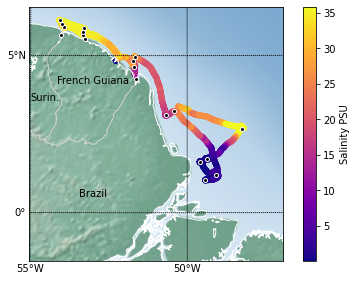

In [6]:
MB.DEBUG = False
#Plot a map of salinity with all OTS stations by specifying the kwarg for adding stations, but not a unique stationslist.
m = MB.MUDBENCS_map(AT_data_df, ' Salinity PSU', label_countries=True, add_stations=True)


plt.tight_layout()
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data/Maps/Salinity_w_stations.svg', dpi=600)

In [7]:
#Syntax for inspecting station coordinates, offered as an example using both station name and station number:
stations=pd.read_csv('MUDBENCS_Stations.csv')
print(stations[stations['Station Name'].str.contains('Oyapock')])
print(stations[stations['Station Number']=='stn06'])

#Note: you can also open the .csv file in a csv viewer like Excel.

   Station Number     Station Name       Lat        Lon
10          stn10    Oyapock Outer  4.966783 -51.672862
11          stn11      Oyapock Mid  4.827228 -51.721250
12          stn12    Oyapock Inner  4.623492 -51.682839
13          stn13  Oyapock Estuary  4.250210 -51.628320
  Station Number  Station Name       Lat        Lon
5          stn06  Amazon Outer  1.198867 -49.094323


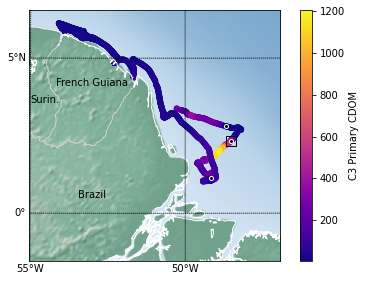

In [8]:
test_stations = ['stn01', 'stn03', 'stn6_TurbEdge']
m = MB.MUDBENCS_map(AT_data_df, ' C3 Primary CDOM', label_countries=True, add_stations=True, stationslist=test_stations, add_front=True)

plt.tight_layout()
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data/Maps/CDOM_tests_and_front.svg', dpi=300)

## Calculate the average position and approximate motion on-station

Using the read_along_track_data function, you can get on-station data by inserting a manual begin_end list of strings. Here, the calculation of the average lat and lon for Station 02 (Seawater Endmember) is shown. More complex calculations can be carried out for each station, but this simple one uses the pandas functions operable on dataframes. The values in square brackets and single quotes are the names of columns of data, and they must match exactly entries from the list of column names. You can see the column names by changing MB.DEBUG to True. 

In [9]:
MB.DEBUG = False
Station_data_df = MB.read_along_track_data(['16 Jun 2023 18:35', '16 Jun 2023 20:15'])
mean_lat = Station_data_df['Lat Dec. Deg.'].mean()
mean_lon = Station_data_df['Lon Dec. Deg.'].mean()
std_lat = Station_data_df['Lat Dec. Deg.'].std()
std_lon = Station_data_df['Lon Dec. Deg.'].std()

print('Mean Lat (std) = %.4f (%.3f), Mean Lon (std) = %.4f (%.3f) ' % (mean_lat, std_lat, mean_lon, std_lon))

Mean Lat (std) = 5.8863 (0.019), Mean Lon (std) = -53.9354 (0.017) 


In [10]:
#Import gravity core lats and longs, as well as isotope data from core catchers to plot into the maps
cc_dat_df = pd.read_csv('Core_Catcher_OrgGeochem.csv')
cc_coords_df = pd.read_csv('Gravity_Core_Coords.csv')
cc_dat_df['Lat Dec. Deg.'], cc_dat_df['Lon Dec. Deg.'] = np.zeros(len(cc_dat_df['Sample ID'])), np.zeros(len(cc_dat_df['Sample ID']))
print(cc_dat_df.columns)

#Add coordinates to data dataframe:
for ind, row in cc_dat_df.iterrows():
    #Find index of coordinate dataframe with the core number in the Sample ID
    for z, coords in cc_coords_df.iterrows():
        if coords['Gravity Core'] in row['Sample ID']:
            lat = coords['Lat']
            lon = coords['Lon']
            cc_dat_df['Lat Dec. Deg.'].iloc[ind] = lat
            cc_dat_df['Lon Dec. Deg.'].iloc[ind] = lon

#Remove flagged data for low N concentrations
cc_dat_noflags_df = cc_dat_df[~(cc_dat_df['flags'] == 'low N')]
print(cc_dat_df.shape, cc_dat_noflags_df.shape)
    



Index(['Sample ID', 'Percent C', 'd13C', 'Percent N', 'd15N', 'C:N', 'Age',
       'flags', 'Lat Dec. Deg.', 'Lon Dec. Deg.'],
      dtype='object')
(13, 10) (11, 10)


c:\Users\beros\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


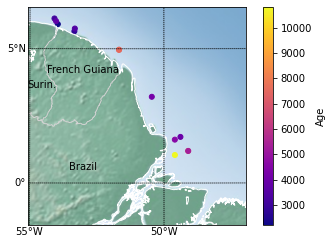

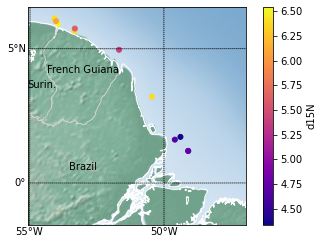

In [11]:
#Make maps of core catcher data from above, chose whether to keep flagged data or remove it

#Keep flagged data
m = MB.MUDBENCS_map(cc_dat_df, 'Age', add_stations=False)
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/CTD_Data/Maps/14C_Age_hiN_CC.svg', dpi=300)
#remove flagged data
m_flagged = MB.MUDBENCS_map(cc_dat_noflags_df, 'd15N', add_stations=False)

                   Sample ID      d15N     N%(N)     C%(N)  umols N (N)  \
0  WS23-139-11MC-3 37.5-40cm  5.028679  0.117491  0.810322     3.099800   
1  WS23-139-10MC-3 37.5-40cm  5.262847  0.112266  0.799235     2.735170   
2  WS23-139-10MC-3 45-47.5cm  4.576080  0.111545  0.779182     2.765698   
3  WS23-139-10MC-3 42.5-45cm  4.417421  0.111712  0.774355     2.622093   
4  WS23-139-11MC-3 5.0-7.5cm  5.172629  0.126060  0.822524     2.955788   

   d15N (C)       d13C        N%        C%  C:N (mass)   umols N    umols C  \
0  5.226818 -24.128121  0.115509  0.723611    6.264558  1.368048   9.997399   
1  4.428560 -26.059420  0.109261  0.773950    7.083475  1.305520  10.787608   
2  4.722623 -25.922771  0.109897  0.741129    6.743872  1.296874  10.202401   
3  4.883548 -26.005846  0.110526  0.743233    6.724528  1.266035   9.931223   
4       NaN        NaN       NaN       NaN         NaN       NaN        NaN   

      _merge  Top Depth  Bottom Depth  Core  
0       both       37.5     

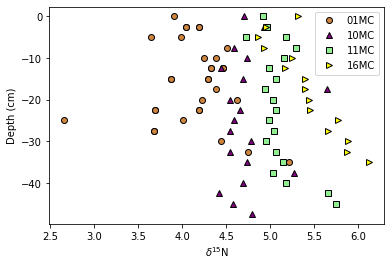

In [17]:
og_df = CN_df

top_depth_list = []
bottom_depth_list = []
core_list = []
for n, row in og_df.iterrows():
    core = row['Sample ID'].split('-')[2]
    top = float(row['Sample ID'].split(' ')[1].split('c')[0].split('-')[0])
    bottom = float(row['Sample ID'].split(' ')[1].split('c')[0].split('-')[1])
    top_depth_list.append(top)
    bottom_depth_list.append(bottom)
    core_list.append(core)

og_df['Top Depth'] = pd.Series(top_depth_list)
og_df['Bottom Depth'] = pd.Series(bottom_depth_list)
og_df['Core'] = pd.Series(core_list)
print(og_df.head())

#Group by core and plot
corelist = ['01MC', '10MC', '11MC', '16MC']
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(og_df[og_df['Core']=='01MC']['d15N'], -og_df[og_df['Core']=='01MC']['Top Depth'], linestyle='', marker='o', mec='k', color='peru')
ax.plot(og_df[og_df['Core']=='10MC']['d15N'], -og_df[og_df['Core']=='10MC']['Top Depth'], linestyle='', marker='^', mec='k', color='purple')
ax.plot(og_df[og_df['Core']=='11MC']['d15N'], -og_df[og_df['Core']=='11MC']['Top Depth'], linestyle='', marker='s', mec='k', color='lightgreen')
ax.plot(og_df[og_df['Core']=='16MC']['d15N'], -og_df[og_df['Core']=='16MC']['Top Depth'], linestyle='', marker='>', mec='k', color='yellow')
ax.set(xlabel=r'$\delta$$^{15}$N', ylabel='Depth (cm)')
ax.legend(corelist)

#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/Coring Data/d15N_MCs_20230921.svg', dpi=300)


In [18]:
#Develop function for the compilation files

carbon_df = pd.read_excel('Mudbencs MC Carbon compiled.xlsx', skiprows=20)
print(carbon_df.columns)
C_df = carbon_df[['Identifier 1', 'd15N (‰, AT-Air)', 'd13C (‰, VPDB)', 'N%', 'C%', 'C:N (mass)', 'N (µmol)', 'C (µmol)']]
print(C_df.shape)
nitrogen_df = pd.read_excel('Mudbencs MC Nitrogen compiled.xlsx', skiprows=20)
N_df = nitrogen_df[['Identifier 1', 'd15N (‰, AT-Air)', 'N%', 'C%', 'N (µmol)']]
print(N_df.shape)
CN_df = N_df.merge(C_df, on='Identifier 1', how='outer', indicator=True, suffixes=('(N)', None))
print(CN_df.shape)

#Rename the columns for ease of use. 
CN_df.rename(columns={
    "Identifier 1": "Sample ID",
    "d15N (‰, AT-Air)(N)": "d15N",
    "N (µmol)(N)":"umols N (N)",
    "d15N (‰, AT-Air)":"d15N (C)",
    "d13C (‰, VPDB)":"d13C",
    "N (µmol)":"umols N",
    "C (µmol)":"umols C"
}, inplace=True)

print(CN_df.head())
#CN_df.to_csv('merged_MC_geochem.csv')

Index(['FileHeader: Filename', 'Time Code', 'Identifier 1', 'Identifier 2',
       'adjusted ID 1', 'adjusted ID 2', 'Ampl  28 (mV)', 'd15N (‰, AT-Air)',
       'Ampl  44 (mV)', 'd13C (‰, VPDB)', 'IRMS comment', 'mass (mg)',
       'N (mg)', 'C (mg)', 'N%', 'C%', 'N (µmol)', 'C (µmol)', 'C:N (mass)',
       'C:N (molar)', 'EA comment', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')
(245, 8)
(252, 5)
(269, 13)
                   Sample ID      d15N     N%(N)     C%(N)  umols N (N)  \
0  WS23-139-11MC-3 37.5-40cm  5.028679  0.117491  0.810322     3.099800   
1  WS23-139-10MC-3 37.5-40cm  5.262847  0.112266  0.799235     2.735170   
2  WS23-139-10MC-3 45-47.5cm  4.576080  0.111545  0.779182     2.765698   
3  WS23-139-10MC-3 42.5-45cm  4.417421  0.111712  0.774355     2.622093   
4  WS23-139-11MC-3 5.0-7.5cm  5.172629  0.126060  0.822524     2.955788   

   d15N (C)       d13C        N%        C%  C:N (mass)   umols N    umols C  \
0  5.226818 -24.128121  0.115

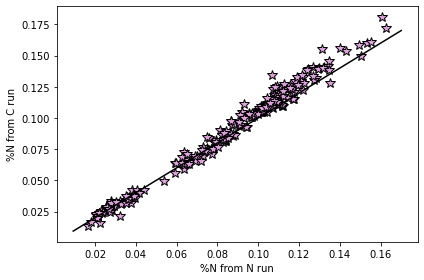

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(CN_df['N%(N)'], CN_df['N%'], marker='*', color='plum', linestyle='', markeredgecolor='k', markersize=10)
xes = ax.get_xlim()
x = np.linspace(min(xes), max(xes), 10)
y = x
ax.plot(x, y, color='k')
ax.set_xlabel('%N from N run')
ax.set_ylabel('%N from C run')
plt.tight_layout()
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/Coring Data/percentN_scatter.svg', dpi=300)

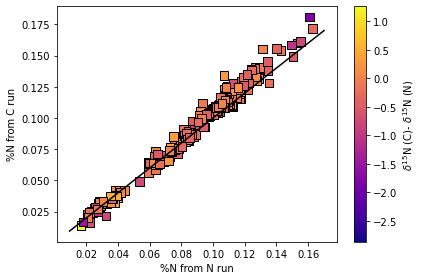

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1)
scatterplot = ax.scatter(CN_df['N%(N)'], CN_df['N%'], c=CN_df['d15N (C)']-CN_df['d15N'], marker='s',  linestyle='None', edgecolor='k', s=75, cmap='plasma')
cbar = plt.colorbar(scatterplot, label=r'$\delta^{15}$N (C)- $\delta^{15}$N (N)')
xes = ax.get_xlim()
x = np.linspace(min(xes), max(xes), 10)
y = x
ax.plot(x, y, color='k')
ax.set_xlabel('%N from N run')
ax.set_ylabel('%N from C run')

plt.tight_layout()
plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/Coring Data/percentN_scatter_isotope_diffs.svg', dpi=300)

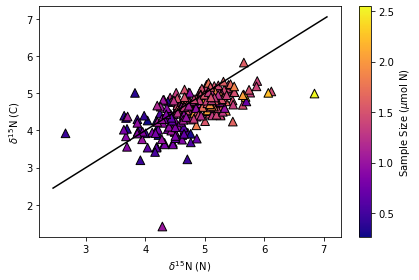

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1)
scatterplot = ax.scatter(CN_df['d15N'], CN_df['d15N (C)'], c=CN_df['umols N'], marker='^',  linestyle='None', edgecolor='k', s=75, cmap='plasma')
cbar = plt.colorbar(scatterplot, label=r'Sample Size ($\mu$mol N)')
xes = ax.get_xlim()
x = np.linspace(min(xes), max(xes), 10)
y = x
ax.plot(x, y, color='k')
ax.set_xlabel(r'$\delta^{15}$N (N)')
ax.set_ylabel(r'$\delta^{15}$N (C)')

plt.tight_layout()
plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/Coring Data/Nisotope_scatter_mass.svg', dpi=300)

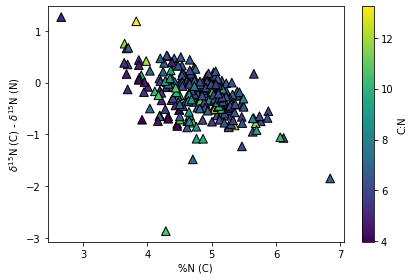

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1)
scatterplot = ax.scatter(CN_df['d15N'], CN_df['d15N (C)'] - CN_df['d15N'], c=CN_df['C:N (mass)'], marker='^',  linestyle='None', edgecolor='k', s=75, cmap='viridis')
cbar = plt.colorbar(scatterplot, label=r'C:N')
xes = ax.get_xlim()
x = np.linspace(min(xes), max(xes), 10)
y = x
#ax.plot(x, y, color='k')
ax.set_xlabel(r'%N (C)')
ax.set_ylabel(r'$\delta^{15}$N (C) - $\delta^{15}$N (N)')

plt.tight_layout()
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/Coring Data/NIsotopeDiff_percentN_CN.svg', dpi=300)

[Text(0.5, 0, 'd15N'), Text(0, 0.5, '%C - %TOC \n (% carbonate estimate)')]

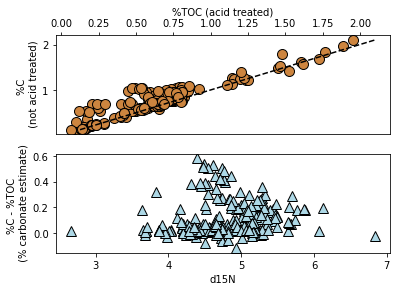

In [24]:
#Investigate the amount of inorganic carbon through comparison of the carbon and nitrogen EA runs
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot(CN_df['C%'], CN_df['C%(N)'], marker='o', mec='k', mfc='peru', linestyle='', markersize=10)
#add 1:1 line:
one_to_one = np.linspace(min(CN_df['C%(N)']), max(CN_df['C%(N)']), 10)
ax[0].plot(one_to_one, one_to_one, linestyle='--', color='k')
ax[0].set(xlabel='%TOC (acid treated)', ylabel='%C \n (not acid treated)')
ax[0].xaxis.set_label_position('top')
ax[0].xaxis.tick_top()

x_column = 'd15N'
ax[1].plot(CN_df[x_column], CN_df['C%(N)']-CN_df['C%'], marker='^', markersize=10, mec='k', mfc='lightblue', linestyle='')
ax[1].set(xlabel=x_column, ylabel='%C - %TOC \n (% carbonate estimate)')

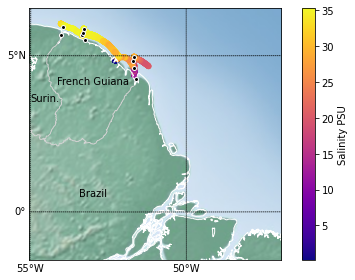

In [ ]:
MB.DEBUG = False
enter_france = pd.to_datetime('2023-06-11 13:30:00')
enter_suriname = pd.to_datetime('2023-06-16 19:00:00')

#Remove Brazil data from compilation of both legs, using station log dates and times:
post_ouca_data_df = AT_data_df.loc[(AT_data_df['Date_Time']>enter_france)]
#Remove first window when ship was in Suriname (Maroni Outer)
leave_Iracoubo = pd.to_datetime('2023-06-15 23:59:00')
reenter_France = pd.to_datetime('2023-06-16 11:00:00')
reenter_suriname = pd.to_datetime('2023-06-16 10:00:00')
transit_back = pd.to_datetime('2023-06-16 22:00:00')
France_MaroniMid_df = post_ouca_data_df.loc[~((post_ouca_data_df['Date_Time']>leave_Iracoubo) & (post_ouca_data_df['Date_Time']<reenter_France)) ]
France_only_df = France_MaroniMid_df.loc[~((France_MaroniMid_df['Date_Time']>reenter_suriname) & (France_MaroniMid_df['Date_Time']<transit_back))]
France_Stations = ['stn10', 'stn11', 'stn12', 'stn13', 'stn14', 'stn15', 'stn16', 'stn17', 'stn19', 'stn20']
france_map = MB.MUDBENCS_map(France_only_df, ' Salinity PSU', label_countries=True, add_stations=True, stationslist=France_Stations)
plt.tight_layout()
#plt.savefig(r'C:\Users\beros\Box\UDrive_brosenheim\My_Documents\Research\Seagoing Expeditions\CHEM-OCE Guianas Mudbanks 2020\Expedition prep\State Docs\Data_Files_for_France\France_stations_salinity_map.svg')
#France_only_df.to_csv(r'C:\Users\beros\Box\UDrive_brosenheim\My_Documents\Research\Seagoing Expeditions\CHEM-OCE Guianas Mudbanks 2020\Expedition prep\State Docs\Data_Files_for_France\France_Along_Track.csv')

In [ ]:
#Print NetCDF files for CTD data for French stations
import glob

#Make list of .cnv files
bottle_file_list = []
for file in glob.glob("*.cnv"):
    bottle_file_list.append(str(file))


#Create dictionaries from processed .cnv files

report_dir = 'C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/State Docs/Data_Files_for_France'
for name in bottle_file_list:
    for station in France_Stations:
        if station.upper() in name:
            print('...converting ', name.split('.')[0], ' to netCDF...')
            dat_nc = fCNV(name)
            dat_df = MB.cnv2df(dat_nc)
            #Save the dataframes:
            dat_df.to_csv(report_dir+'/'+name+'.csv')
            print(dat_df.shape, ' ...shape of new df, now saved to directory.')

...converting  WS23139_STN10_08CTD  to netCDF...


OSError: [Errno 22] Invalid argument

In [ ]:
#Save all bottle files to directory
